# 해당 파일은 Fastcampus 훈련 자료 내 코드에 개인 주석을 단 파일입니다.

### 실습 데이터셋
* 데이터셋: Diabetes Data
* 데이터셋 개요 :
첫번째 회귀 모델링 방법론 실습은 sklearn에서 제공하는 당뇨병 진행도 예측 데이터셋을 활용합니다.
이 데이터셋은 총 442개의 샘플을 포함하며, 각 샘플은 다음과 같은 10개의 인풋 피쳐로 구성됩니다.
  - age: 나이
  - sex: 성별
  - bmi: Body mass index
  - bp: Average blood pressure
  - 혈청에 대한 6가지 지표들(S1, S2, S3, S4, S5, S6)

  데이터셋의 target은 다른 피쳐들의 측정 시점으로부터 1년 후 당뇨병이 진행된 정도를 나타내는 수치로 주어지는데, 이 실습에서는 선형회귀모델을 학습해 target값을 예측해보도록 합니다.
* 데이터셋 저작권 : BSD License



In [16]:
# 데이터 관련 기본 라이브러리 (이 3개는 무엇을 하든 무조건 쓸듯)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 추가적인 데이터 시각화 라이브러리
import seaborn as sns

# 데이터셋 import 함수
from sklearn.datasets import load_diabetes

# data를 train/validation/test로 나누어 주는 함수
from sklearn.model_selection import train_test_split

# 선형 회귀 모델 함수
from sklearn.linear_model import LinearRegression

# MSE 구하는 함수추가
from sklearn.metrics import mean_squared_error

In [17]:
# 데이터 셋 로드
diabetes = load_diabetes(scaled=False)
#scaled : bool, default=True
#     If True, the feature variables are mean centered and scaled by the
#     standard deviation times the square root of `n_samples`.
#     If False, raw data is returned for the feature variables.
# 대충 표준화? 같은거 안하고 그냥 생 data 받고 싶기 때문에 scaled = False를 쓴듯.

# 데이터셋의 설명(Description) 확인
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Target: Column 11 is a quantitative measure of disease progression one year after baseline  
라는 줄을 통해 label이 되어 있는 것은 Target으로 명명 된 것을 확인 할 수 있고, 환자의 대한 정보는 Attribute Information을 통해 알 수 있다.

In [18]:
# 데이터 처리가 편한 pandas로 data 옮겨주기
data = diabetes["data"]   # 분석에 필요한 정보만 가져오기 (DESCR 같은거 제외)
data = pd.DataFrame(data, columns=diabetes["feature_names"])

In [19]:
# 원본에는 없지만 꼭 가져온 data 전문을 한번 봐주는게 좋은 것 같음. 내가 어떻게 처리 해야할지 생각할 시간을 주는 것
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


# 표준화를 해야 하는 이유
단위를 신경 쓰지 않고 비교하기 위해라고 생각하면 편하다.  
예를들어 토익 600점이 수능영어 100점을 비교하고는 토익 600점이 영어를 더 잘한다는 소리가 나올 수 있기 때문.  

In [20]:
# 표준화 방식의 전처리 적용을 위해 feature 별 평균값, 표준편차를 계산
fts_mean = data.mean(axis=0)  # axis가 0이면 행 계산, 1이면 열계산, 차원이 높아지만 그에따라 axis 변경해줘야 함
fts_std = data.std(axis=0)

# 평균이 0, 표준편차가 1이 되도록 표준화
data = (data - fts_mean) / fts_std

# 결과 확인. 모든 변수가 평균 0, 표준편차 1로 조정된 것 확인 (완벽한 1, 0으로 바뀌지는 않을 것임.)
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,0.000000,2.893613e-16,-4.694083e-15,-1.000708e-15,-2.893613e-16,8.238759e-16,-1.245861e-16,-1.527185e-16,1.945151e-15,2.531911e-16
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.251738,-9.374744e-01,-1.895781e+00,-2.360375e+00,-2.662394e+00,-2.427874e+00,-2.148448e+00,-1.604285e+00,-2.648040e+00,-2.893112e+00
25%,-0.783285,-9.374744e-01,-7.188104e-01,-7.697777e-01,-7.192046e-01,-6.375263e-01,-7.374604e-01,-8.293610e-01,-6.981574e-01,-6.967595e-01
50%,0.113044,-9.374744e-01,-1.529591e-01,-1.190789e-01,-9.073818e-02,-8.020037e-02,-1.382738e-01,-5.443750e-02,-4.089059e-02,-2.263165e-02
75%,0.799594,1.064282e+00,6.562083e-01,7.485196e-01,5.955183e-01,6.267323e-01,6.155415e-01,7.204860e-01,6.810788e-01,5.862581e-01
max,2.325260,1.064282e+00,3.581660e+00,2.772916e+00,3.232188e+00,4.174548e+00,3.804760e+00,3.889923e+00,2.805543e+00,2.847848e+00


In [21]:
# label에 적힌 값은 1년 후 질병의 진행률을 정량적으로 측정한 값이다.
target = diabetes["target"]
# target 변수의 모양 및 처음 10개 확인
print(target.shape)
print("Original targe values : ", target[:10])

# target의 평균값, 표준편차를 계산
tgt_mean = target.mean()
tgt_std = target.std()

# 표준화 적용
target = (target - tgt_mean) / tgt_std

# 결과 확인
print("Scaled target values : ", target[:10]) # 처음 10개 표준화 된 거 확인
print(f"Mean : {target.mean()}, std : {target.std()}") # 표준화된 target의 평균과 표준편차 확인

(442,)
Original targe values :  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]
Scaled target values :  [-0.01471948 -1.00165882 -0.14457991  0.69951294 -0.22249618 -0.71596585
 -0.18353805 -1.15749134 -0.54714728  2.05006151]
Mean : -1.687940888117885e-16, std : 1.0


In [23]:
# dataset을 train/validation/test로 분할
# 재현성을 위해 random state를 지정
random_state = 1111  # seed 같은 느낌이기에 어떤 숫자가 들어가도 상관 없음. rand 함수 고정용임

# train_data, test_data를 7:3 비율로 분할 test_size를 변화하면 비율 변화 가능 dataset을 train/validation/test로 분할
# 재현성을 위해 random state를 지정
random_state = 1111  # seed 같은 느낌이기에 어떤 숫자가 들어가도 상관 없음. rand 함수 고정용임

# train_data, test_data를 7:3 비율로 분할 test_size를 변화하면 비율 변화 가능
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3, random_state=random_state)

# 분할 확인
print(f"train data: {train_data.shape}")
print(f"train target: {train_target.shape}")
print(f"test data: {test_data.shape}")
print(f"test target: {test_target.shape}")

train data: (309, 10)
train target: (309,)
test data: (133, 10)
test target: (133,)


## 데이터 전처리가 끝났으니 선형회귀 모델을 사용해 보자.

In [24]:
# (다중) 선형회귀모델 초기화
multi_regressor = LinearRegression()

# 학습용 데이터셋을 활용해 학습 진행
multi_regressor.fit(train_data, train_target)

# 회귀식의 intercept(ax+b에서 b부분; y 절편) 확인
# 모든 데이터 평균이 0이 되도록 전처리 했으므로 0에 가까운 값이 나와야 정상임
print("intercept: ", multi_regressor.intercept_)
# 학습된 회귀식 확인 (계수: ax+b의 a부분)
print("coefficients: ", multi_regressor.coef_)

intercept:  -0.0017029636555825796
coefficients:  [ 0.0102865  -0.19547942  0.34118854  0.21364359 -0.4406124   0.2252958
  0.09358096  0.13713625  0.44288378  0.05132672]


In [25]:
# 학습, 평가 데이터셋에서 회귀식의 예측값 계산
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

# 위의 예측값을 목표값과 비교해 MSE 손실함수의 값 계산
multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)
print(f"Train MSE: {multi_train_mse:.5f}")
print(f"Test MSE: {multi_test_mse:.5f}")

Train MSE: 0.48774
Test MSE: 0.48547


목표값을 x, 예측값을 y에 배치하였을 때의 산점도를 도식화 했을때 x=y 직선에 가까워야 한다.
시각화 결과 샘플들이 x=y 주변에 샘플들이 몰려 있으면 모델의 예측이 성공적이었다는 것을 확인할 수 있음

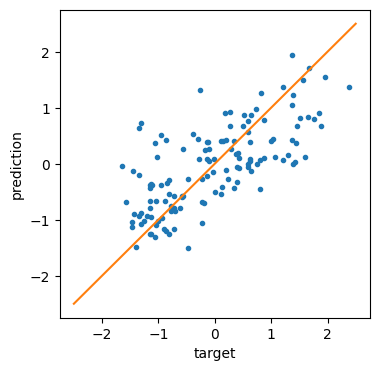

In [30]:
plt.figure(figsize=(4, 4)) # figure 생성

plt.xlabel("target")        # x축에 이름 넣어 놓기
plt.ylabel("prediction")    # y축에 이름 넣어 놓기

# 테스트셋의 목표값(x축)과 모델의 예측값(y축)을 산점도로 도식화
y_pred = multi_test_pred  # test data의 예측값을 y_pred라는 변수에 저장한다.
plt.plot(test_target, y_pred, '.')           # 실제값-예측값을 .으로 표시

# y = x 직선을 플롯. 이 직선에 가까운 점일수록 정확한 예측이다.
x = np.linspace(-2.5, 2.5, 10) # -2.5 ~ 2.5까지 10개의 리스트 = [-2.5, -2, -1.5, ... ,2 ,2.5]
y = x
plt.plot(x, y) # y = x 라는 식이 위에 보이니 해당 직선이 어떻게 나올지 예상 가능하지?

plt.show()

In [33]:
# MSE function 을 사용하는 선형회귀 모델의 경우 해석저거 해법이 알려져 있음.
# 이를 일반적인 linear equation인 Ax=b 형태로 변형한다.
A = train_data.T @ train_data
b = train_data.T @ train_target

# numpy를 활용해 linear equation 풀기
coef = np.linalg.solve(A, b)

# 학습된 parameter를 이용해 예측값을 내놓는 함수를 정의
def predict(data, coef):
    return data @ coef

# 학습, 평가 데이터셋에서 회귀식의 예측값 계산
train_pred = predict(train_data, coef)
test_pred = predict(test_data, coef)

# 위의 예측값을 목표값과 비교해 MSE 손실함수의 값 계산
train_mse = mean_squared_error(train_pred, train_target)
test_mse = mean_squared_error(test_pred, test_target)

print(f"Multi Regression Train MSE is {train_mse:.5f}")
print(f"Multi Regression Test MSE is {test_mse:.5f}")


Multi Regression Train MSE is 0.48775
Multi Regression Test MSE is 0.48552


In [34]:
# scikit-learn 패키지를 활용한 학습 결과
print(multi_regressor.coef_)
# 해석적 해법을 이용해 직접 계산한 학습 결과
print(coef)

[ 0.0102865  -0.19547942  0.34118854  0.21364359 -0.4406124   0.2252958
  0.09358096  0.13713625  0.44288378  0.05132672]
[ 0.01031407 -0.19555811  0.34121274  0.21355396 -0.44036806  0.22496163
  0.09359078  0.13715189  0.44283816  0.0513602 ]


차이가 무척 적은 것을 통해 해석적 해법 또한 효과가 비슷하다는 것을 알 수 있다.

# 상관행렬의 시각화

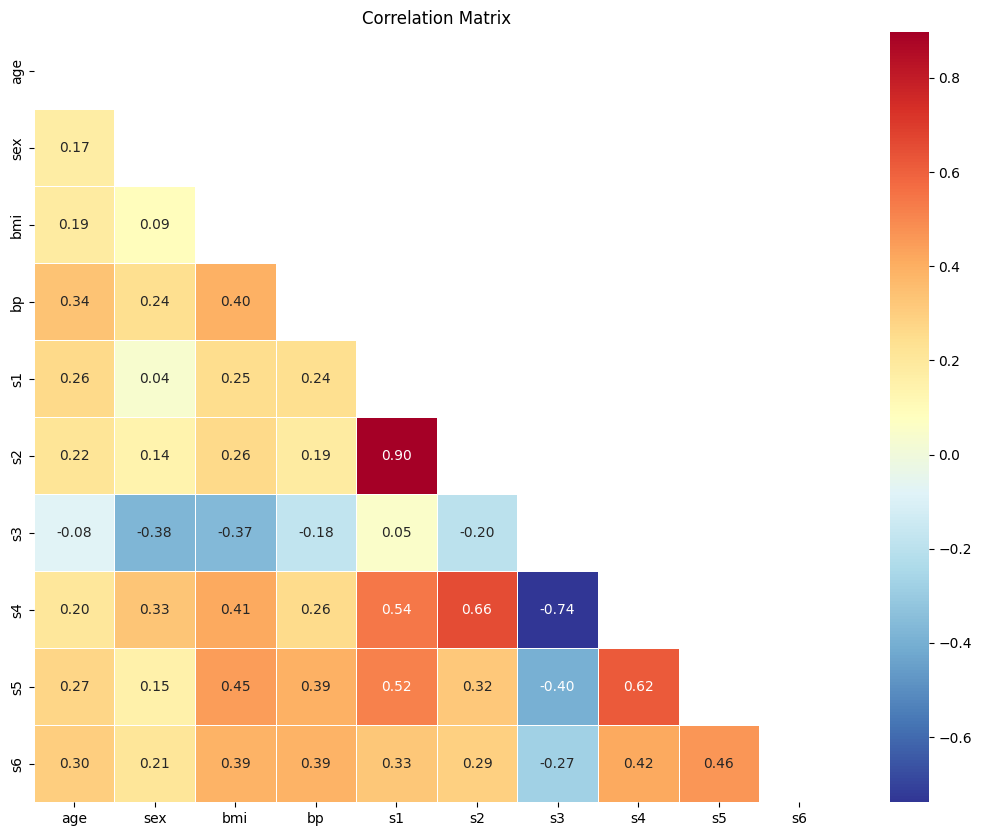

In [36]:
# 데이터의 상관계수 행렬을 생성
corr = data.corr(numeric_only=True)

# figure에서 생략될 부분을 지정하는 mask 행렬을 생성
mask = np.ones_like(corr, dtype=bool)
mask = np.triu(mask)

# 시각화될 그림의 크기를 지정
# 히트맵 형태로 상관행렬 시각화하기
plt.figure(figsize=(13,10))
sns.heatmap(data=corr, annot=True, fmt='.2f', mask=mask, linewidths=.5, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# 단순선형회귀분석을 진행할 두 변수를 선정 : -0.20의 상관계수를 보이는  S3-S2 비교
x_feature = "s3"
y_feature = "s2"

# 모델 초기화 및 학습
simple_regressor = LinearRegression()
simple_regressor.fit(data[[x_feature]], data[[y_feature]])

# 결과 회귀계수 확인
coef = simple_regressor.coef_
print(coef)

[[-0.19645512]]


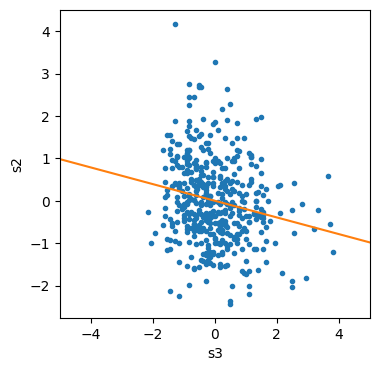

In [38]:
# 원본 데이터변수를 산점도로 시각화
plt.figure(figsize=(4, 4))
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.plot(data[[x_feature]], data[[y_feature]], ".")

# 전체 데이터를 도식화 할 x값 범위를 설정
x_min, x_max = -5, 5
plt.xlim(x_min, x_max)

# 회귀 직선식을 플롯
x = np.linspace(x_min, x_max, 10)
y = coef.item() * x  # item() 함수는 원소가 1개인 array를 단순 scalar로 변환할 때 사용
plt.plot(x, y)

plt.show()